###**URBAN MOBILITY MEETS AI: A MACHINE LEARNING APPROACH TO CAPITAL BIKESHARE**


In [ ]:
#import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



**Data normalization** here is for equalizing the range of all features, which is important to PCA as they are scale-dependent. In sci-kit learn, the StandardScaler will accomplish this: Normalize the data using a preprocessing module.
The StandardScaler standardizes features by removing the mean and scaling to unit variance.  Namely, each feature value is normalized in the following manner.
Namely, each feature value is normalized in the following manner:

𝑧 = x - 𝜇 / 𝜎

The value σ represents the deviation from standard in the whole feature.
The transformed data has a mean of 0 and a standard deviation equal to one after scaling, thus reducing different modes into the same format across different feature variables for cases like PCA.


In [ ]:

# Select numerical columns to normalize
numerical_columns = ['start_lat', 'start_lng', 'end_lat', 'end_lng', 'duration', 'distance', 'start_day', 'start_month', 'start_hour']

# Standardize the data
scaler = StandardScaler()
scaled_data= scaler.fit_transform(df[numerical_columns])

scaled_data

array([[-0.88595243,  0.08700068, -0.20971196, ...,  0.09053329,
         0.01456681, -1.08602026],
       [-0.88595243,  0.08700068, -0.86092825, ..., -0.71982164,
         0.01456681, -1.28604164],
       [-0.44270321, -1.29639752, -0.1931653 , ...,  0.09053329,
         0.01456681, -0.88599888],
       ...,
       [-0.44105333, -0.43480419,  0.71048898, ...,  0.78512323,
         0.01456681, -0.6859775 ],
       [ 0.21266378, -0.82672835,  1.21930814, ..., -1.41441158,
         0.01456681,  0.11410801],
       [ 0.76703365, -0.4534847 ,  1.21930814, ..., -1.1828816 ,
         0.01456681, -1.48606301]])

In [ ]:
#  PCA with n_components=2
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(scaled_data)

In [ ]:
# PCA with n_components=3
pca_3 = PCA(n_components=3)
pca_3_result = pca_3.fit_transform(scaled_data)

In [ ]:
# Convert results to DataFrames for better visualization
pca_2_df = pd.DataFrame(pca_2_result, columns=['PC1', 'PC2'])
pca_3_df = pd.DataFrame(pca_3_result, columns=['PC1', 'PC2', 'PC3'])


In [ ]:
# explained variance ratios for both PCA results
print("Explained variance ratio with 2 components:", pca_2.explained_variance_ratio_)
print("Explained variance ratio with 3 components:", pca_3.explained_variance_ratio_)

Explained variance ratio with 2 components: [0.21691771 0.192272  ]
Explained variance ratio with 3 components: [0.21691771 0.192272   0.16570237]


In [ ]:
# the PCA-transformed data
print("PCA with 2 Components:\n", pca_2_df.head())
print("PCA with 3 Components:\n", pca_3_df.head())

PCA with 2 Components:
         PC1       PC2
0  0.297849 -0.818928
1  0.897408 -0.901799
2 -0.931307 -1.356756
3  1.878088 -0.186343
4 -0.514722  1.377956
PCA with 3 Components:
         PC1       PC2       PC3
0  0.297849 -0.818928  0.642236
1  0.897408 -0.901799 -0.490672
2 -0.931307 -1.356756 -0.246175
3  1.878088 -0.186343 -0.097445
4 -0.514722  1.377956 -1.296899


In [ ]:
# Function to create 2D and 3D visualizations based on the number of components
def plot_pca(pca_df, components=2):
    if components == 2:
        # 2D Plot
        plt.figure(figsize=(8, 6))
        plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
        plt.title("2D PCA (n_components=2)")
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.grid(True)
        plt.show()
    elif components == 3:
        # 3D Plot
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], alpha=0.5)
        ax.set_title("3D PCA (n_components=3)")
        ax.set_xlabel("Principal Component 1")
        ax.set_ylabel("Principal Component 2")
        ax.set_zlabel("Principal Component 3")
        plt.show()
    else:
        print("This function supports only 2 or 3 components for PCA visualization.")


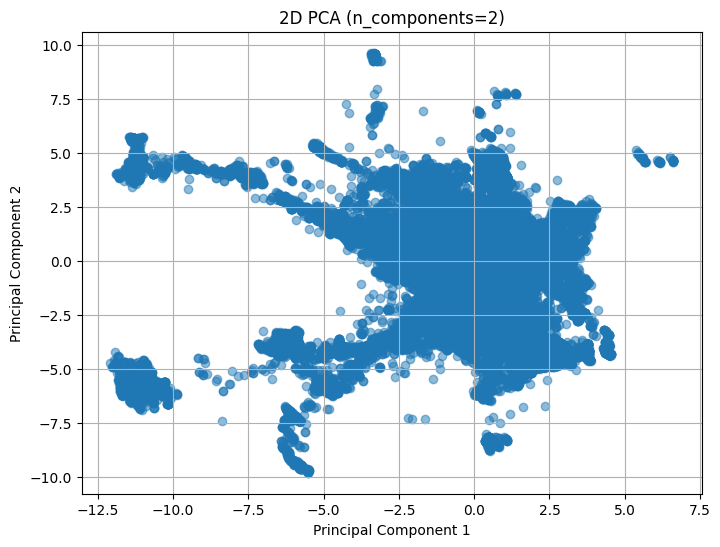

In [ ]:
#  2D PCA
plot_pca(pca_2_df, components=2)

**Observations:**
The 2D PCA plot illustrates the reduction of the dataset into two principal components, enabling a simplified visualization of high-dimensional data. The x-axis and y-axis represent the first and second principal components, respectively, which account for the maximum variance in the data. The distribution of points illustrates the variability accounted for by these components, with a denser concentration at the center signifying numerous similar data points. Outliers emerge in the less populated areas, possibly signifying distinctive or anomalous occurrences. This visualization elucidates the dataset's structure, emphasizing relationships among features and potential patterns or clusters.

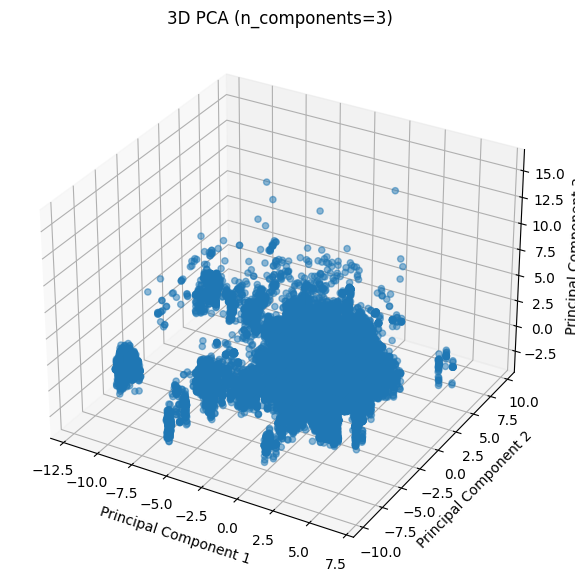

In [ ]:
#3D PCA
plot_pca(pca_3_df, components=3)

**Observations:**The 3D PCA plot illustrates the dataset's reduction into three principal components, offering a three-dimensional perspective of the data's variance. The axes denote the first, second, and third principal components, each accounting for a substantial fraction of the dataset's variability. This three-dimensional representation facilitates a more profound examination of the data's architecture, with a concentrated cluster at the center denoting equivalent data points and outliers dispersed along the periphery signifying distinctive or anomalous occurrences. The plot is instrumental in identifying complex patterns and relationships that may remain hidden in lower-dimensional representations.


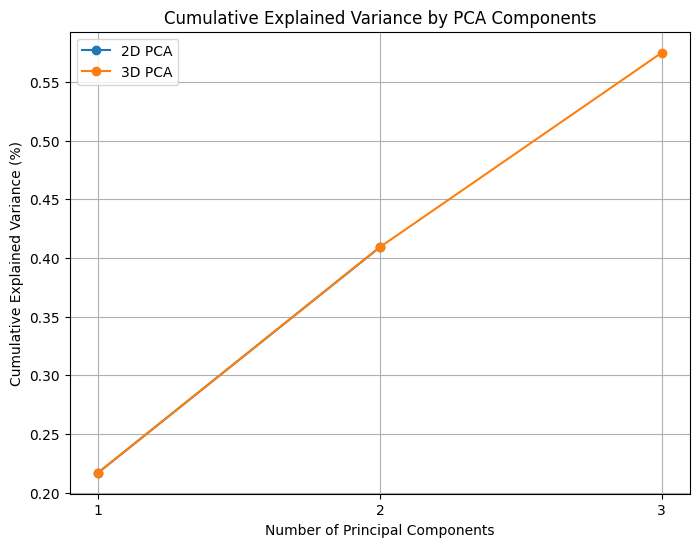

Total explained variance retained in 2D dataset: 40.92%
Total explained variance retained in 3D dataset: 57.49%


In [ ]:
# Calculate the cumulative explained variance for both 2D and 3D PCA
explained_variance_2d = pca_2.explained_variance_ratio_.cumsum()
explained_variance_3d = pca_3.explained_variance_ratio_.cumsum()

# Plot cumulative explained variance for both 2D and 3D PCA
plt.figure(figsize=(8, 6))
plt.plot([1, 2], explained_variance_2d, marker='o', label='2D PCA')
plt.plot([1, 2, 3], explained_variance_3d, marker='o', label='3D PCA')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.xticks([1, 2, 3])
plt.grid(True)
plt.legend()
plt.show()

# Print out the total explained variance percentages for 2D and 3D datasets
print(f"Total explained variance retained in 2D dataset: {explained_variance_2d[-1] * 100:.2f}%")
print(f"Total explained variance retained in 3D dataset: {explained_variance_3d[-1] * 100:.2f}%")


**Observations:**

The findings concerning the retention of information in both the 2D and 3D PCA datasets, based on the above findings, are as follows:

**2D PCA:** Reducing the dataset to two principal components (n_components=2) retains approximately 40.92% of the total variance. Consequently, 2D PCA accounts for less than fifty percent of the original dataset's variability. This dimensionality reduction streamlines the dataset, yet a significant amount of information is forfeited.

**3D PCA:**With three components (n_components=3), the captured variance rises to approximately 57.49%. This demonstrates that 3D PCA preserves a larger fraction of the dataset's variance than 2D PCA, albeit at the expense of some information from the original dataset. Utilizing three components, slightly more than fifty percent of the dataset's information is retained.It underscores the compromise between dimensionality reduction and information preservation. Although 2D PCA offers a more straightforward representation, 3D PCA encompasses considerably greater variance, rendering it a superior option for preserving the dataset's structure while effectively reducing dimensions.


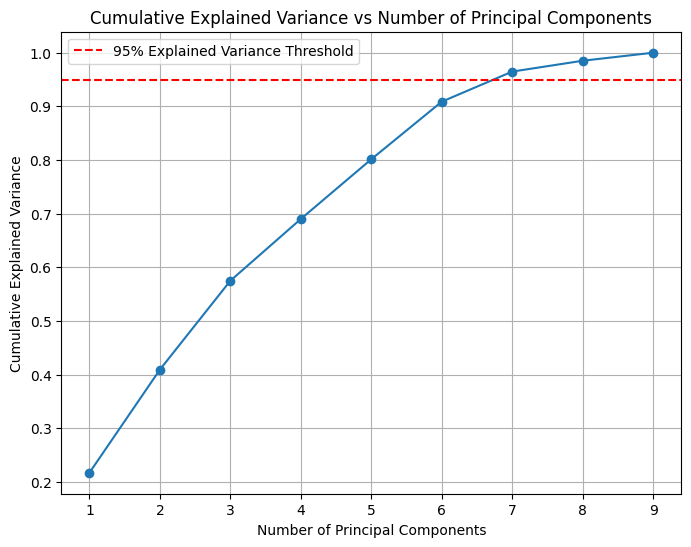

Number of components needed to retain at least 95% of the variance: 7


In [ ]:
# Perform PCA on the scaled data
pca_full = PCA()
pca_full.fit(scaled_data)

# Calculate cumulative explained variance
cumulative_explained_variance = pca_full.explained_variance_ratio_.cumsum()

# Find the number of components needed to retain at least 95% variance
components_needed = (cumulative_explained_variance >= 0.95).argmax() + 1  # Add 1 because index is 0-based

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance Threshold')
plt.title('Cumulative Explained Variance vs Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.show()

print(f"Number of components needed to retain at least 95% of the variance: {components_needed}")


**Observations:** The cumulative explained variance plot indicates that 7 principal components are required to preserve a minimum of 95% of the total variance in the dataset. The intersection of the cumulative explained variance curve and the red dashed line signifies the 95% explained variance threshold.

Practically, this indicates that by implementing PCA and condensing the dataset to 7 dimensions, 95% of the original information will be retained, thereby minimizing information loss while substantially decreasing the number of features. This dimensionality reduction can streamline the data and improve computational efficiency, while maintaining the essential structure and variability of the dataset.

In [ ]:
# Get the eigenvalues (explained variance) from the PCA components
eigenvalues = pca_full.explained_variance_

# print the top three eigenvalues
top_three_eigenvalues = eigenvalues[:3]

print(f"Top three eigenvalues of the data: \n1. {top_three_eigenvalues[0]:.6f}\n2. {top_three_eigenvalues[1]:.6f}\n3. {top_three_eigenvalues[2]:.6f}\n")



Top three eigenvalues of the data: 
1. 1.952264
2. 1.730452
3. 1.491325



 **Observations:** According to the provided image, the **three highest eigenvalues** of the dataset are:

1.9523,1.7305,1.4913
These eigenvalues denote the extent of variance explained by their respective principal components. A greater eigenvalue indicates that the component captures more variance from the data. The first principal component accounts for the greatest variance, succeeded by the second and third components. These eigenvalues are essential in dimensionality reduction methods such as PCA, as they ascertain the number of components required to account for a substantial portion of the data's variance.